# Welcome to the <span style="color:blue">Statistical Methods of Language Technologyb SoSe21</span> course
###  Dr. Seid Muhie Yimam
   * Email: yimam@informatik.uni-hamburg.de
   * Office: Informatikum, F-415
  
###  Dr. Özge Alaçam
   * Email: alacam@informatik.uni-hamburg.de
   * Office: Informatikum, F-435

## Topic of this week;
In this first practice class, we are going to focus on two main topics, which will be useful to complete the assignment;
* Latent Semantic Analysis (LSA)
* Latent Dirichlet Allocation (LDA)


## Deadline: 16/21 June

___

# <span style="color:red"> Preperation: R installation </span>

The exercises can be done with R, but you can also use any programming language. A small introduction into R can be found in moodle.


* Download and install R ([http://www.r-project.org/](http://www.r-project.org/)) current version 4.1.0 
or you can also use R with Anaconda installation here [https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/](https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/)

* For Linux, you might need to add a repository, e.g. [https://cran.uni-muenster.de/](https://cran.uni-muenster.de/)

* You can also install RStudio Desktop  ([https://rstudio.com/products/rstudio/download/#download](https://rstudio.com/products/rstudio/download/#download))

* Or having an installation in your own computer is recommended, but if it does not work, you can access to our R server [https://ltdemos.informatik.uni-hamburg.de/rserver/](https://ltdemos.informatik.uni-hamburg.de/rserver/) with your LDAP credentials. 


After installation, you can run R by executing: 

<code> \$ R </code> in the command line terminal. 

We will also need a package called tm (text mining). This can be installed within R by typing:
<code> > install.packages("tm",dep=T) </code> 

If you want to install it systemwide open R as Administrator.
R can be closed by typing <code> q() </code> or pressing **Ctrl+D**.
If you want to use functions of the *tm package* you have to load it. This can be done by typing:

<code> > library(tm) </code>


# <span style="color:red"> In class Exercises </span>

## <span style="color:red"> Problem 8.1 Latent Semantic Analysis (LSA) </span>

<span style="color:red">a)  Download and extract the additional data from moodle. The archive contains the training documents for this exercise.  </span>
All files start with *c* (for corpus), the second letter indicates the *topic* of the document.

<span style="color:red">b) Read the training files:</span>

* load the text mining package:
<code> library(tm) </code>

* load the names of the training documents:
<code> files =  DirSource(".",pattern="^c.*")  </code>
    
* create a corpus and read the files:
<code> training=Corpus(files) </code>

* to get an impression of the training object type:
<code> training </code>

* to get a deeper look into the documents type:
<code> inspect(training) </code>

* to convert the documents to a document term matrix use:
<code> dtm = DocumentTermMatrix(training,control=list(tolower=F)) </code>










<span style="color:red"> c) List the number of times and the percentage of following terms within the corpus and the percentage of occurrence within a document : “bank”, “money”, “stream” , “river”  </span>

**Hint:** use <code> as.matrix(dtm) </code> to convert the document term matrix to a “real matrix”

<code> m = as.matrix(dtm) </code> \
<code> sum(m[,"bank"]) </code> \
<code>  sum(m[,"money"]) </code> \
<code> sum(m[,"stream"]) </code> \
<code> sum(m[,"river"])</code> \
<code> sum(m[,"bank"])/sum(m) </code> \
<code> sum(m[,"money"])/sum(m) </code> \
<code> sum(m[,"stream"])/sum(m) </code> \
<code> sum(m[,"river"])/sum(m) </code> \


* Count how often the number is greater than 0 and divide it by the number of columns/documents \\

<code>dim(m[m[,"bank"]>0,])[1] / length(m[,1]) </code> \
<code>dim(m[m[,"money"]>0,])[1] / length(m[,1]) </code> \
<code>dim(m[m[,"river"]>0,])[1] / length(m[,1]) </code> \
<code>dim(m[m[,"stream"]>0,])[1] / length(m[,1]) </code> \


<span style="color:red">  d) Plot the first two dimensions of the document matrix using singular value decomposition </span>

**Hints:** 
*  The R command for SVD is ```svd(Matrix)``` (lookup the command ```?svd```).  ```svd(Matrix)```  returns an object with values ```u,s,v``` which can be accessed using: 

<code> s = svd(Matrix) </code> \
<code> s\$u;s\$v;s\$d </code>  

* If you want to transpose a matrix use <code>t(matrix) </code> 
* Matrix multiplication is done by <code> V \%*\% U </code> 
* You can use the provided plot function <code> plotLatentVariables} </code> 

## Plot method
```
plotLatentVariables<-function(val,files,showFilenames=F){
	f = substr(basename(files$filelist),0,2)
	t = unique(f)
	s = match(f,t)
	plot(val,pch=s,col=s)
	legend("topleft", legend=t, pch=1:length(t),col=1:length(t))
	if(showFilenames){
		text(val, labels=basename(files$filelist))
		}
	}
```
## apply svd on the document term matrix

```
r=svd(dtm)
 u = r$u
 s = diag(r$d)
 v = r$v
 plotLatentVariables (u, files )
 plotLatentVariables (u, files, showFilenames = TRUE)
 
 ```
    

### Hints from lecture Slides:
<img src="LSA_1.png" width=60%>
<img src="LSA_2.png" width=60%>
<img src="LSA_3.png" width=60%>


# R cheatsheet

## R plot pch symbols : The different point shapes available in 
### Different plotting symbols are available in R. The graphical argument used to specify point shapes is pch.
    pch = 0,square
    pch = 1,circle
    pch = 2,triangle point up
    pch = 3,plus
    pch = 4,cross
    pch = 5,diamond
    pch = 6,triangle point down
    pch = 7,square cross
    pch = 8,star
    pch = 9,diamond plus
    pch = 10,circle plus
    pch = 11,triangles up and down
    pch = 12,square plus
    pch = 13,circle cross
    pch = 14,square and triangle down
    pch = 15, filled square
    pch = 16, filled circle
    pch = 17, filled triangle point-up
    pch = 18, filled diamond
    pch = 19, solid circle
    pch = 20,bullet (smaller circle)
    pch = 21, filled circle blue
    pch = 22, filled square blue
    pch = 23, filled diamond blue
    pch = 24, filled triangle point-up blue
    pch = 25, filled triangle point down blue

## To get current working directory
```getwd()```
### To change working directory
```setwd("/path/to/dir")```

## <span style="color:red"> Problem 8.2 Latent Dirichlet Allocation </span>

<span style="color:red">  a) Download, unpack and compile GibbsLDA++ (http://gibbslda.sourceforge.net/) into the corpus directory. </span>
**Note:** on some systems, you need to add $#include <cstdlib>$ to util.cpp, and $#include <stdio.h>$ to lda.cpp for compilation)  \
``` $ wget http://downloads.sourceforge.net/project/gibbslda/GibbsLDA++/0.2/GibbsLDA++-0.2.tar.gz

 $ tar -xzvf GibbsLDA++-0.2.tar.gz 
 
 $ cd GibbsLDA++-0.2 
 
 $ make clean all 

```
If you encounter problems during compilation, you will need to add dependencies to files in <code> ./src/ </code>

* **utils.cpp** $#include <cstdlib>$
* **lda.cpp** $#include <stdio.h>$


<span style="color:red">  b) Convert the training documents from \ref{sec:1} into the format for \mbox{GibbsLDA} with the following specification: </span> \
GibbsLDA File Format Specification: \


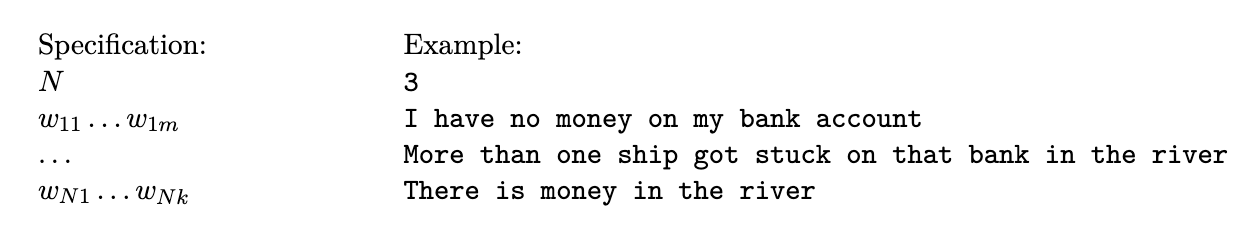



* run the following command inside the "PS-08-data" folder \

```f=lda-input.txt; ls c* | wc -l | tr -d " " > $f; cat c* >> $f ```

<span style="color:red">  c) Train GibbsLDA with 3 topics (as we have 3 different kinds of documents). Inspect all output files.  </span> 

``` GibbsLDA++-0.2/src/lda -est -beta 0.01 -ntopics 3 -niters 500 -twords 30 -dfile lda-input.txt ```


Output files:\
model-final.twords: contains most likely words per topic \
model-final.tassign: contains the topic assignment of each word in the training data \
model-final.theta: topic-document distribution \
model-final.phi: word-topic distribution \
wordmap.txt: vocabulary with index of each word 

<span style="color:red">  d) Compare the topic distribution of each document with every other document and plot the result.  </span> \
Use the following distance function between two documents $x$ and $y$ (represented as vectors of topic probabilities), where $K$ is the number of topics:
$$
d(x,y) = \sqrt{ \sum\limits_{k=1}^{K} ( x_k - y_k )^2}
$$
Briefly describe what you see. \

```
library(tm) 
 t = read.table("model-final.theta") 
 f = DirSource(".",pattern="^c.*") 
 fp = substr(basename(f$filelist),0,2) 
 color = rainbow(length(unique(fp))) 
 ndoc = dim(t)[1] 
 #initialize plot   
 plot(c(),xlim=c(1,ndoc),ylim=c(0,1),xaxt="n", xlab="Document", ylab="Similarity") 
 sim=matrix(0,ndoc,ndoc) 
 for(i in 1:ndoc){ 
   fpi = which(unique(fp)==fp[i])
   v1=t[i,]
  for(j in 1:ndoc){
    v2=t[j,]
    sim[i,j]=1-sqrt(sum((v1-v2)^2))
   }
   lines(1:ndoc,sim[i,],col=color[fpi]) # add lines to the plot 
 } 
 axis(1,at=1:length(fp),basename(f$filelist)) 
 legend("bottomright",legend=unique(fp), col=color,lty=1) 
 # another view on the data 
 #X11() # opens a new window for a second plot, keeps the previous available. 
 # If X11() is not working, comment it as well heatmap() below and see plots separately 
 heatmap(sim, Rowv=NA, Colv=NA, symm=T)
 ```

### Hints from lecture Slides:
<img src="LDA_1.png" width=60%>
<img src="LDA_2.png" width=60%>
<img src="LDA_3.png" width=60%>
<img src="LDA_4.png" width=60%>
<img src="LDA_5.png" width=60%>
<img src="LDA_6.png" width=60%>